In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data
df_trees = pd.read_csv('./data/Street_Tree_Census/2015_Street_Tree_Census_-_Tree_Data_20250830.csv')
print('Records:', len(df_trees))
print('Columns:', list(df_trees.columns))
df_trees[:1]

Records: 683788
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09


In [3]:
# "lm" stands for Lower Manhattan.
df_trees_manhattan = df_trees[
    (
        (df_trees['status'] == 'Alive')
        & (df_trees['borough'] == 'Manhattan')
    )
]
print('Records:', len(df_trees_manhattan))
print('Columns:', list(df_trees_manhattan.columns))
df_trees_manhattan[:1]

Records: 62427
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
5,190422,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,8 COLUMBUS AVENUE,10023,New York,107,1,Manhattan,3,67,27,MN14,Lincoln Square,1014500,New York,40.770046,-73.98495,988418.6997,219825.5227,3.0,145.0,1076229.0,1.011310e+09


In [4]:
# "lm" stands for Lower Manhattan.
df_trees_lm = df_trees[
    (
        (df_trees['status'] == 'Alive')
        & (df_trees['borough'] == 'Manhattan')
        & (
            (df_trees['nta_name'] == 'SoHo-TriBeCa-Civic Center-Little Italy')
            | (df_trees['nta_name'] == 'Battery Park City-Lower Manhattan')
            | (df_trees['nta_name'] == 'Chinatown')
            | (df_trees['nta_name'] == 'West Village')
            | (df_trees['nta_name'] == 'Lower East Side')
            | (df_trees['nta_name'] == 'East Village')
        )
    )
]
print('Records:', len(df_trees_lm))
print('Columns:', list(df_trees_lm.columns))
df_trees_lm[:1]

Records: 11839
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
28,201555,102919,09/04/2015,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,NoDamage,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,71 STANTON STREET,10002,New York,103,1,Manhattan,1,65,26,MN27,Chinatown,1003601,New York,40.721807,-73.98983,987069.0888,202250.6142,1.0,3601.0,1077637.0,1.004160e+09


In [25]:
# "wv" stands for West Village.
df_trees_wv = df_trees[
    (
        (df_trees['status'] == 'Alive')
        & (df_trees['borough'] == 'Manhattan')
        & (
            (df_trees['nta_name'] == 'West Village')
        )
    )
]
print('Records:', len(df_trees_wv))
print('Columns:', list(df_trees_wv.columns))
df_trees_wv[:1]

Records: 3715
Columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode', 'zip_city', 'community board', 'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
64,195252,102084,09/01/2015,5,0,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,138 WEST 11 STREET,10011,New York,102,1,Manhattan,3,66,27,MN23,West Village,1007100,New York,40.736,-73.999859,984288.9796,207421.1872,3.0,71.0,1078115.0,1.006060e+09


In [5]:
df_trees[['status']].value_counts()

status
Alive     652173
Stump      17654
Dead       13961
Name: count, dtype: int64

In [6]:
df_trees[['borough']].value_counts()

borough      
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: count, dtype: int64

In [7]:
df_trees[
    df_trees['status'] == 'Alive'
][['health']].value_counts()

health
Good      528850
Fair       96504
Poor       26818
Name: count, dtype: int64

In [8]:
df_trees[df_trees['borough'] == 'Manhattan'][['nta_name']].value_counts()

nta_name                                  
Upper West Side                               5881
Upper East Side-Carnegie Hill                 4673
West Village                                  3837
Central Harlem North-Polo Grounds             3515
Washington Heights South                      2990
Hudson Yards-Chelsea-Flatiron-Union Square    2988
Morningside Heights                           2751
Washington Heights North                      2684
Central Harlem South                          2670
East Harlem North                             2591
Hamilton Heights                              2407
Lenox Hill-Roosevelt Island                   2327
Yorkville                                     2269
Turtle Bay-East Midtown                       2253
SoHo-TriBeCa-Civic Center-Little Italy        2215
Lincoln Square                                2065
East Harlem South                             2014
Clinton                                       2008
Lower East Side                        

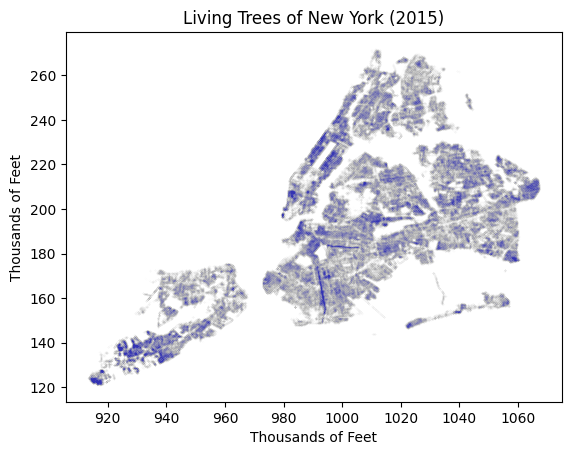

In [9]:
df = df_trees[
    df_trees['status'] == 'Alive'
]

# TODO - make equal aspect

plt.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.01))
plt.title('Living Trees of New York (2015)')
plt.xlabel('Thousands of Feet')
plt.ylabel('Thousands of Feet')
plt.show()

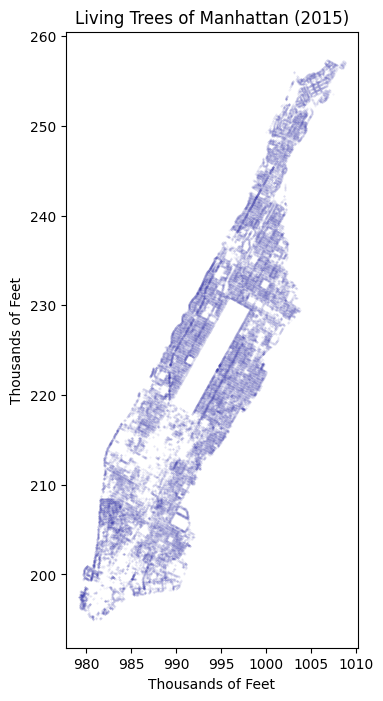

In [10]:
# +1 credit for DonFactorial for believing in an error free python cell
df = df_trees[
    (df_trees['status'] == 'Alive')
    & (df_trees['borough'] == 'Manhattan')
]

fig, ax = plt.subplots(figsize=(8, 8))  # x-dimension gets "forgotten" after set_aspect().

ax.set_aspect('equal', adjustable='box')
ax.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.1))
ax.set_title('Living Trees of Manhattan (2015)')
ax.set_xlabel('Thousands of Feet')
ax.set_ylabel('Thousands of Feet')
plt.show()

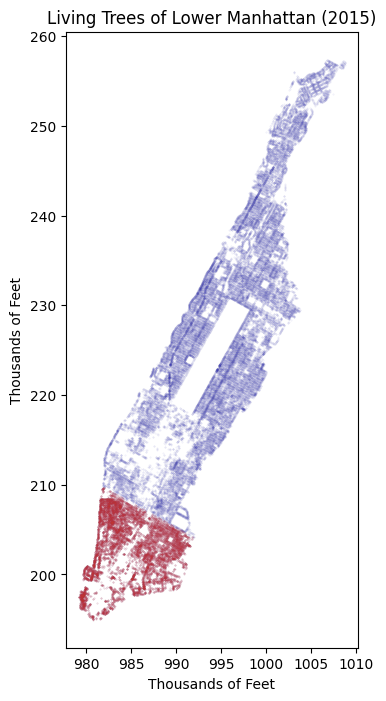

In [11]:
df = df_trees[
    (df_trees['status'] == 'Alive')
    & (df_trees['borough'] == 'Manhattan')
]
df_highlight = df_trees_lm

fig, ax = plt.subplots(figsize=(8, 8))  # x-dimension gets "forgotten" after set_aspect().

ax.set_aspect('equal', adjustable='box')
ax.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.1))
ax.scatter(df_highlight['x_sp'] / 1000, df_highlight['y_sp'] / 1000, s=0.1, color=(0.8, 0.2, 0.2, 0.2))
ax.set_title('Living Trees of Lower Manhattan (2015)')
ax.set_xlabel('Thousands of Feet')
ax.set_ylabel('Thousands of Feet')
plt.show()

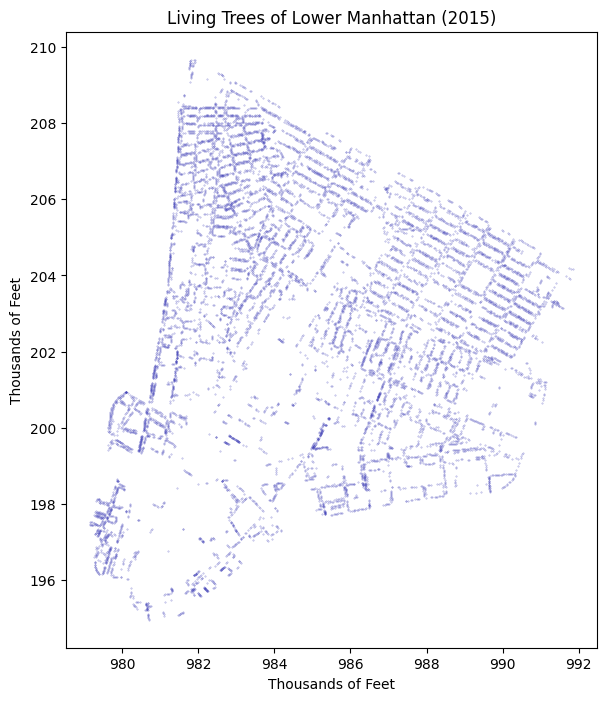

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))  # x-dimension gets "forgotten" after set_aspect().

ax.set_aspect('equal', adjustable='box')
ax.scatter(df_trees_lm['x_sp'] / 1000, df_trees_lm['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.5))
ax.set_title('Living Trees of Lower Manhattan (2015)')
ax.set_xlabel('Thousands of Feet')
ax.set_ylabel('Thousands of Feet')
plt.show()

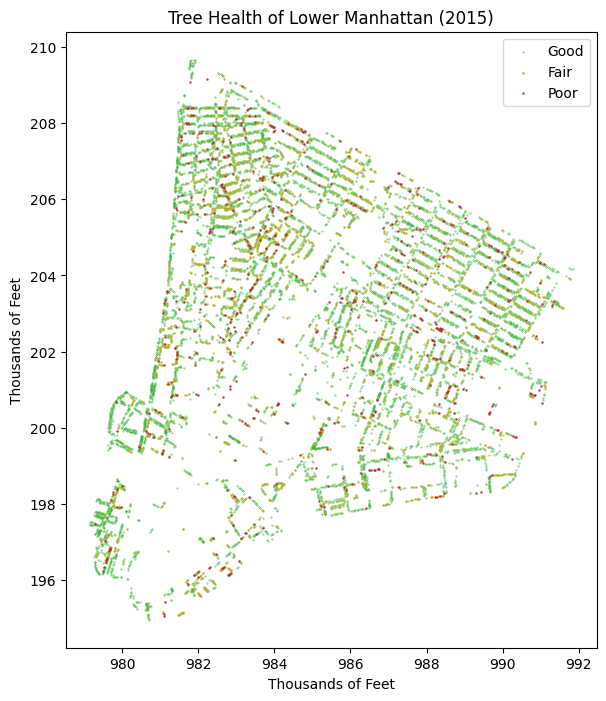

In [13]:
df_trees_good = df_trees_lm[
    (df_trees_lm['status'] == 'Alive')
    & (df_trees_lm['health'] == 'Good')
]
df_trees_fair = df_trees_lm[
    (df_trees_lm['status'] == 'Alive')
    & (df_trees_lm['health'] == 'Fair')
]
df_trees_poor = df_trees_lm[
    (df_trees_lm['status'] == 'Alive')
    & (df_trees_lm['health'] == 'Poor')
]

fig, ax = plt.subplots(figsize=(8, 8))  # x-dimension gets "forgotten" after set_aspect().

ax.set_aspect('equal', adjustable='box')
ax.scatter(df_trees_good['x_sp'] / 1000, df_trees_good['y_sp'] / 1000, s=0.1, color=(0.2, 0.7, 0.2, 1.0), label='Good')
ax.scatter(df_trees_fair['x_sp'] / 1000, df_trees_fair['y_sp'] / 1000, s=0.5, color=(0.7, 0.7, 0.2, 1.0), label='Fair')
ax.scatter(df_trees_poor['x_sp'] / 1000, df_trees_poor['y_sp'] / 1000, s=0.5, color=(0.7, 0.2, 0.2, 1.0), label='Poor')
ax.set_title('Tree Health of Lower Manhattan (2015)')
ax.set_xlabel('Thousands of Feet')
ax.set_ylabel('Thousands of Feet')
ax.legend()
plt.show()

In [14]:
df_trees_lm[['spc_latin', 'spc_common']].value_counts()[:15]

spc_latin                           spc_common       
Gleditsia triacanthos var. inermis  honeylocust          2329
Pyrus calleryana                    Callery pear         1477
Ginkgo biloba                       ginkgo               1190
Platanus x acerifolia               London planetree      896
Styphnolobium japonicum             Sophora               818
Zelkova serrata                     Japanese zelkova      764
Tilia cordata                       littleleaf linden     636
Quercus palustris                   pin oak               510
Tilia americana                     American linden       316
Fraxinus pennsylvanica              green ash             239
Prunus                              cherry                222
Ulmus americana                     American elm          205
Quercus phellos                     willow oak            202
Quercus rubra                       northern red oak      173
Quercus bicolor                     swamp white oak       153
Name: count, dty

In [15]:
df_trees_lm[['spc_latin', 'spc_common']].value_counts()[-50:]

spc_latin                         spc_common         
Carpinus japonica                 Japanese hornbeam      11
Acer saccharinum                  silver maple           11
Acer campestre                    hedge maple            11
Cornus alternifolia               pagoda dogwood         11
Juglans nigra                     black walnut           10
Taxodium distichum                bald cypress           10
Eucommia ulmoides                 hardy rubber tree       9
Crataegus                         hawthorn                8
Cornus mas                        Cornelian cherry        8
Aesculus glabra                   Ohio buckeye            8
Prunus serotina                   black cherry            7
Acer ginnala                      Amur maple              7
Amelanchier                       serviceberry            7
Corylus colurna                   Turkish hazelnut        6
Betula pendula                    silver birch            6
Betula nigra                      river birch 

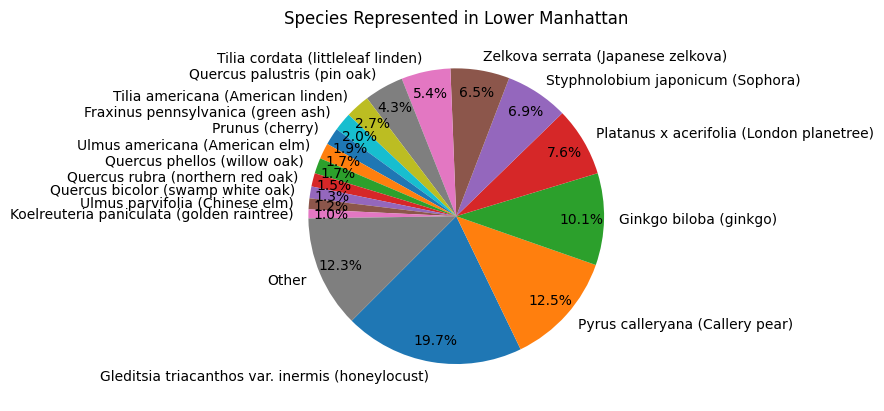

In [16]:
df = df_trees_lm

df_labeled = df['spc_latin'] + ' (' + df['spc_common'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 100  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Species Represented in Lower Manhattan',
    autopct='%1.1f%%',
    pctdistance=0.85,  # Determined by fiddling.
    startangle=-135,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

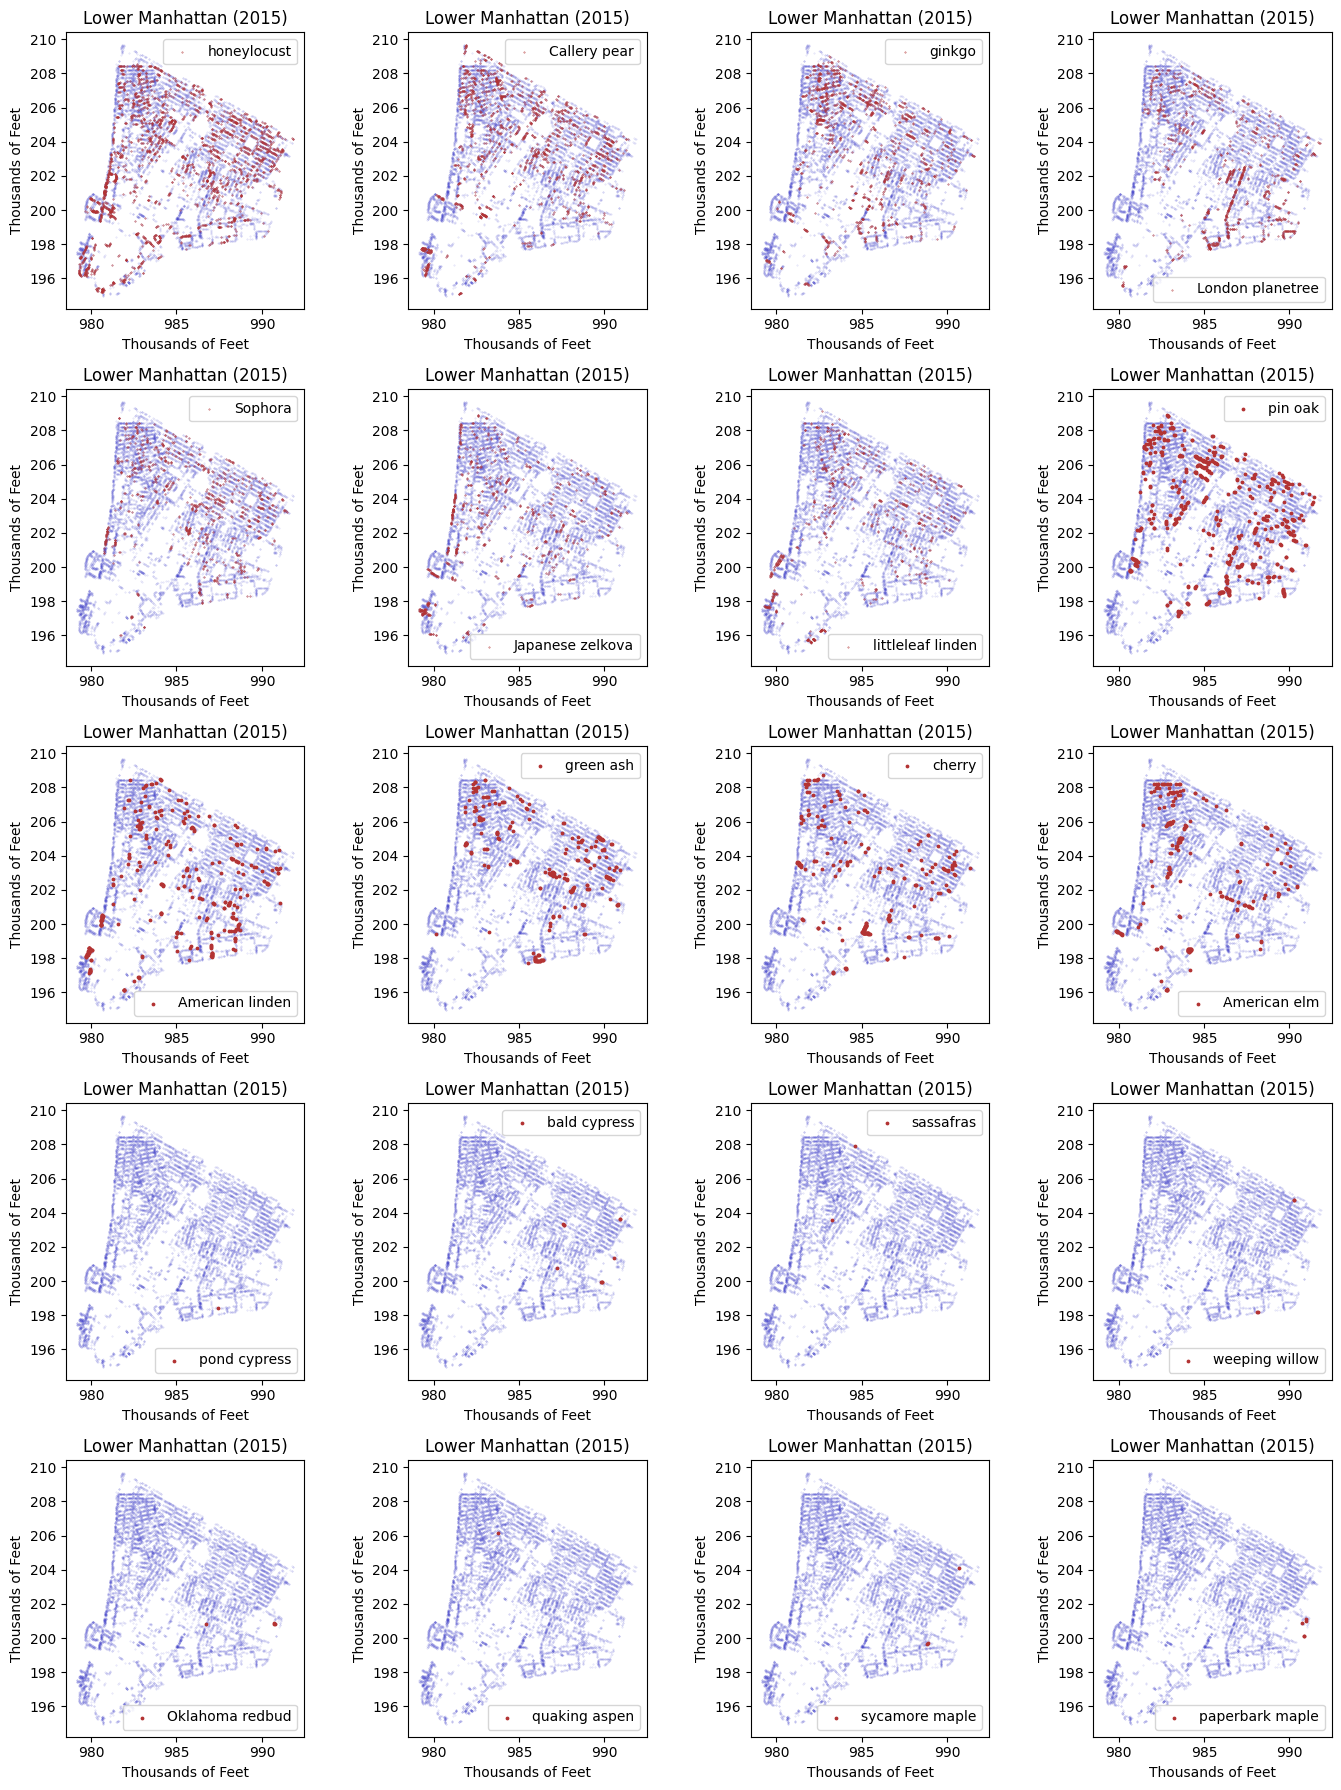

In [17]:
tree_names = [
    'honeylocust',
    'Callery pear',
    'ginkgo',
    'London planetree',

    'Sophora',
    'Japanese zelkova',
    'littleleaf linden',
    'pin oak',

    'American linden',
    'green ash',
    'cherry',
    'American elm',

    'pond cypress',
    'bald cypress',
    'sassafras',
    'weeping willow',

    'Oklahoma redbud',
    'quaking aspen',
    'sycamore maple',
    'paperbark maple',
]

col_count = 4
row_count = (len(tree_names) - 1) // col_count + 1 

fig, axes = plt.subplots(row_count, col_count, figsize=(14, 18))

for i, tree_name in enumerate(tree_names):
    r = i // col_count
    c = i - r * col_count
    
    df_trees_target = df_trees_lm[
        (df_trees_lm['status'] == 'Alive')
        & (df_trees_lm['spc_common'] == tree_name)
    ]

    ratio_target = len(df_trees_target) / len(df_trees_lm)
    if ratio_target > .05:
        s = 0.1
    else:
        s = 3

    ax = axes[r, c]
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(df_trees_lm['x_sp'] / 1000, df_trees_lm['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.8, 0.2))
    ax.scatter(df_trees_target['x_sp'] / 1000, df_trees_target['y_sp'] / 1000, s=s, color=(0.7, 0.2, 0.2, 1.0), label=tree_name)
    ax.set_title('Lower Manhattan (2015)')
    ax.set_xlabel('Thousands of Feet')
    ax.set_ylabel('Thousands of Feet')
    ax.legend()

# +1 points for klonopincommander for showing me this!
plt.tight_layout()
plt.show()

In [18]:
def calculate_extents(df):
    return {
        "x_min": df['x_sp'].min().item(),
        "x_max": df['x_sp'].max().item(),
        "y_min": df['y_sp'].min().item(),
        "y_max": df['y_sp'].max().item(),
    }
    
def draw_heatmap(df, x_min=None, extents=None, n_bins=None, title=None, figsize=None):
    if extents is None:
        extents = calculate_extents(df)

    x_min = extents["x_min"]
    x_max = extents["x_max"]
    y_min = extents["y_min"]
    y_max = extents["y_max"]
    
    x_extent = x_max - x_min
    y_extent = y_max - y_min

    if n_bins is None:
        n_bins = 15
    bin_dim = x_extent / (n_bins + 1)  # feet per bin

    n_bins_x = n_bins
    n_bins_y = int(np.ceil(y_extent / bin_dim))

    # TODO - Is this binning being stupid and dumping items at the edges into the right-most bins twice?

    dfbins = df.copy()
    dfbins['xbin'] = np.minimum(np.floor(((dfbins['x_sp'] - x_min) / bin_dim)).astype(np.int64), n_bins_x - 1)
    dfbins['ybin'] = np.minimum(np.floor(((dfbins['y_sp'] - y_min) / bin_dim)).astype(np.int64), n_bins_y - 1)

    # y major indexing for this image
    heatmap_data = np.zeros((n_bins_y, n_bins_x), dtype=int)
    bin_counts = dfbins.groupby(['ybin', 'xbin']).size()
    for (ybin, xbin), count in bin_counts.items():
        if ybin >= 0 and ybin < n_bins_y and xbin >= 0 and xbin < n_bins_x:
            heatmap_data[ybin, xbin] = count

    if figsize is None:
        aspect_ratio = x_extent / y_extent
        figsize = (6, 6 / aspect_ratio)
    
    plt.figure(figsize=figsize)

    extent = [x_min, x_max, y_min, y_max]
    plt.imshow(heatmap_data, origin='lower', extent=extent, cmap='viridis')
    
    plt.colorbar(label='Number of Trees')
    if title is not None:
        plt.title(title)   

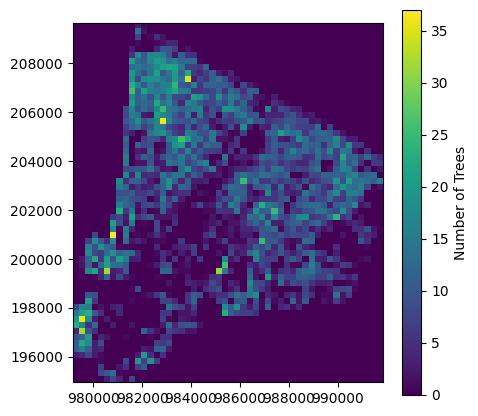

In [19]:
draw_heatmap(df_trees_lm, n_bins=50, figsize=(5, 5))

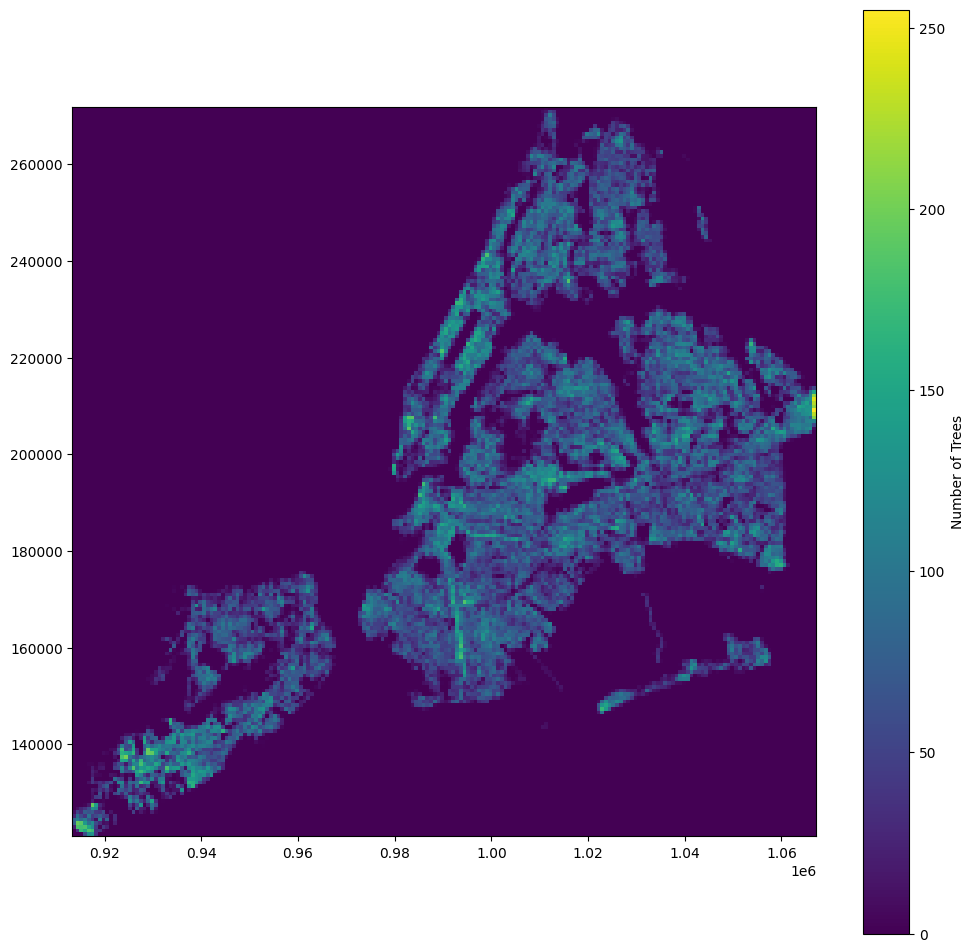

In [20]:
draw_heatmap(df_trees, n_bins=200, figsize=(12, 12))

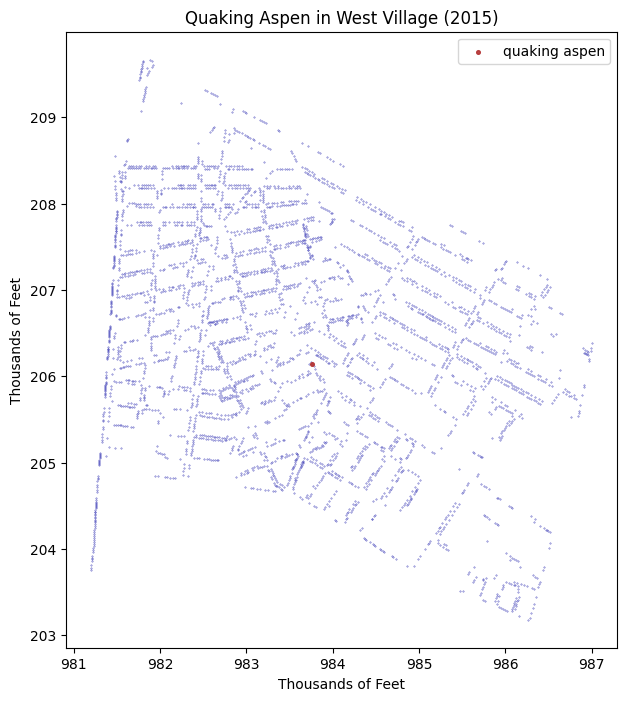

        tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status  \
536691    12958    101796  06/08/2015         6           0   OnCurb  Alive   

       health            spc_latin     spc_common steward guards sidewalk  \
536691   Fair  Populus tremuloides  quaking aspen     NaN    NaN   Damage   

        user_type problems root_stone root_grate root_other trunk_wire  \
536691  Volunteer   Stones        Yes         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  \
536691         No         No         No        No         No   

                  address  postcode  zip_city  community board  borocode  \
536691  181 WEST 4 STREET     10014  New York              102         1   

          borough  cncldist  st_assem  st_senate   nta      nta_name  boro_ct  \
536691  Manhattan         3        66         27  MN23  West Village  1007100   

           state   latitude  longitude         x_sp         y_sp  \
536691  New York  40.732

In [33]:
df = df_trees_lm[df_trees_lm['spc_common'] == 'quaking aspen']

fig, ax = plt.subplots(figsize=(8, 8))  # x-dimension gets "forgotten" after set_aspect().

ax.set_aspect('equal', adjustable='box')
ax.scatter(df_trees_wv['x_sp'] / 1000, df_trees_wv['y_sp'] / 1000, s=0.1, color=(0.2, 0.2, 0.7, 0.9))
ax.scatter(df['x_sp'] / 1000, df['y_sp'] / 1000, s=7.0, color=(0.7, 0.2, 0.2, 0.9), label='quaking aspen')
ax.set_title('Quaking Aspen in West Village (2015)')
ax.set_xlabel('Thousands of Feet')
ax.set_ylabel('Thousands of Feet')
ax.legend()
plt.show()

print(df)